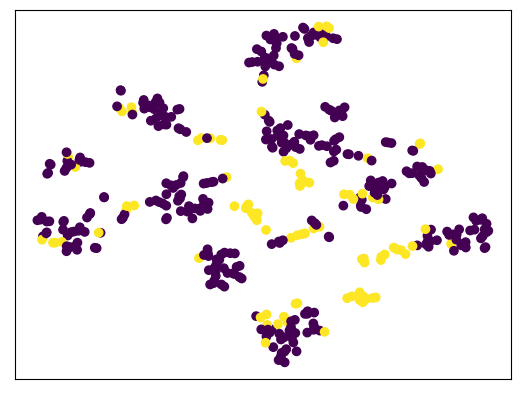

In [4]:
import glob
from pathlib import Path

import dgl
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.manifold import TSNE

basepath = "../results/experiment_10_infmax_rice_deepwalk_skip"

def plot_emb(basepath, emb_idx=0, plotname="2d embedding", figname="2d_embedding.png"):

    emb_files = glob.glob(str(Path(basepath) / "embeddings") + "/*.pt")
    # related graph file
    graph = dgl.load_graphs(str(Path(basepath) / "graph" / "graph.bin"))[0][0]

    embedding_ckpt = torch.load(emb_files[emb_idx])
    emb = embedding_ckpt['embedding']
    groups = graph.ndata['groups']

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(emb)
    fig = plt.figure()
    
    # plt.title(plotname)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=groups, cmap="viridis")
    plt.axis('tight')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(figname)
    plt.show()

plot_emb(basepath)

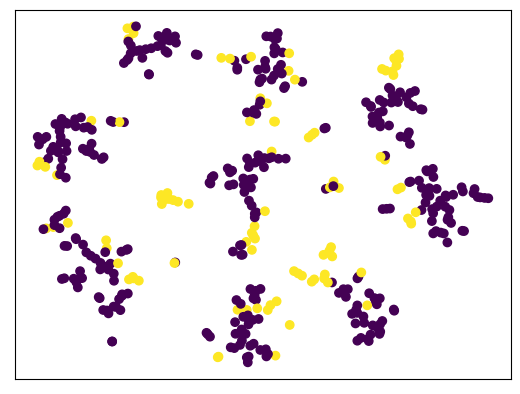

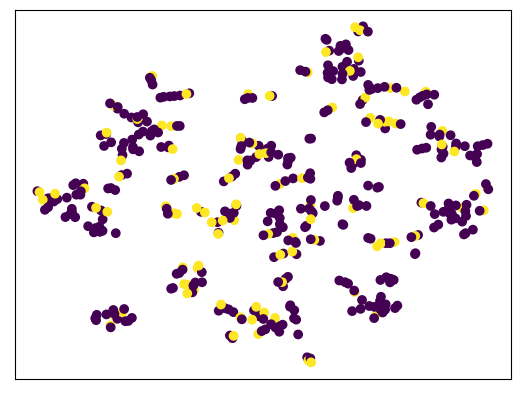

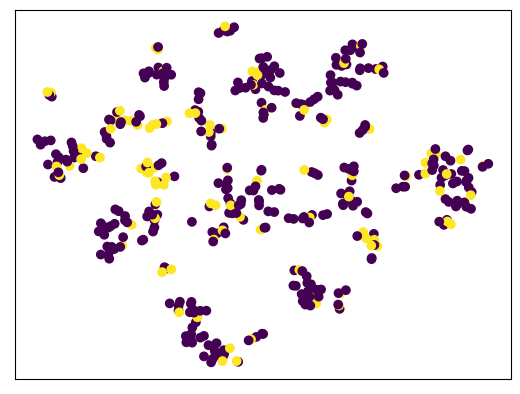

In [51]:
skip_fp = "../results/experiment_2_infmax_rice_deepwalk_skip"
fairwalk_fp = "../results/experiment_1_infmax_rice_deepwalk_fairwalk"
crosswalk_fp = "../results/experiment_0_infmax_rice_deepwalk_crosswalk"

plot_emb(skip_fp, plotname="2d projection of embedding with no reweighting", figname="skip_embedding.png")
plot_emb(fairwalk_fp, plotname="2d projection of fairwalk embedding", figname="fairwalk_embedding.png")
plot_emb(crosswalk_fp, plotname="2d projection of crosswalk embedding", figname="crosswalk_embedding.png")

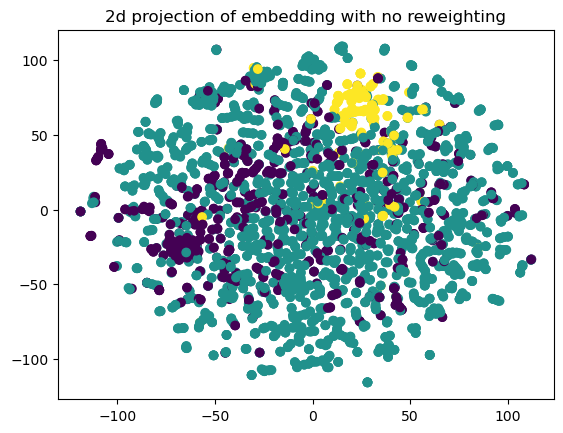

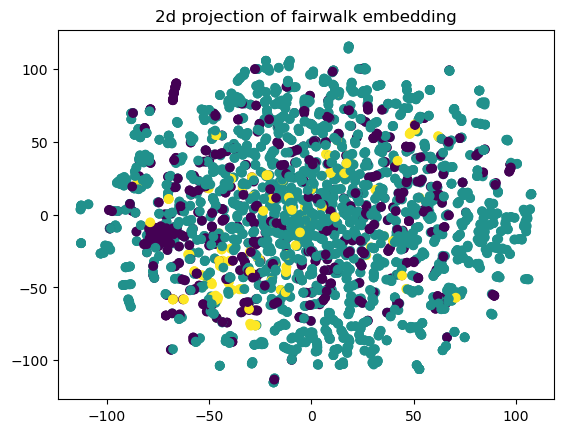

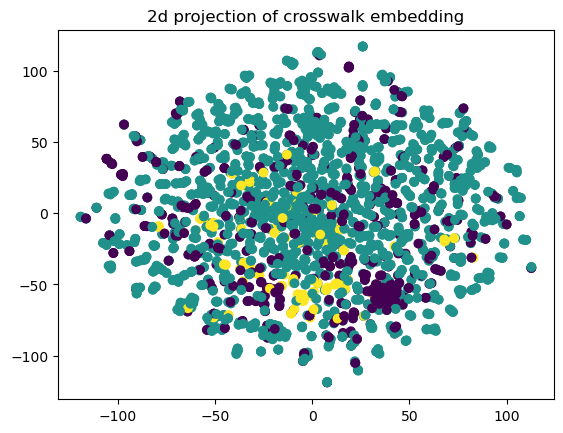

In [35]:
skip_fp = "/home/parting/master_AI/FACT/FACT-2023-group-15/crosswalk_reimplemented/results/experiment_17_infmax_twitter_deepwalk_skip"
fairwalk_fp = "/home/parting/master_AI/FACT/FACT-2023-group-15/crosswalk_reimplemented/results/experiment_14_infmax_twitter_deepwalk_fairwalk"
crosswalk_fp = "/home/parting/master_AI/FACT/FACT-2023-group-15/crosswalk_reimplemented/results/experiment_13_infmax_twitter_deepwalk_crosswalk"

plot_emb(skip_fp, plotname="2d projection of embedding with no reweighting")
plot_emb(fairwalk_fp, plotname="2d projection of fairwalk embedding")
plot_emb(crosswalk_fp, plotname="2d projection of crosswalk embedding")